# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?


## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

1) 1/9th of the values should have a first digit of 1 if the numbers are random
2) 1/9th of the values should have a last digit of 1 if the numbers are random


## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file `sp500.csv` contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [1]:
# ENTER YOUR CODE HERE.

import pandas as pd
df = pd.read_csv("sp500.csv")
df = df.set_index("Name")
df.head()

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798


1. The stock index should be the unit of observation. This is because it is a label and all the other columns describe it. 


## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

1    66
4    57
3    57
9    56
0    55
6    51
2    49
5    47
7    41
8    26
Name: volume, dtype: int64


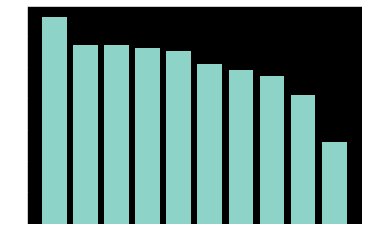

In [2]:
# ENTER YOUR CODE HERE.
df.volume = df.volume.apply(str)

digit_frequency = df.volume.str[1].value_counts()
print(digit_frequency)


import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(digit_frequency.index,digit_frequency)
plt.show()
# plt.hist(df.volume.str[1].apply(int), bins =[0.5,1.5,2.5])

In question 0, we predicted that each digit would be equally likely, however, that is not the case. 1 is most likely and 8 is the least likely. The digits size is inversely proportional to its likelihood. 

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

8    56
2    56
9    53
1    53
7    52
0    52
6    51
3    48
5    44
4    40
Name: volume, dtype: int64


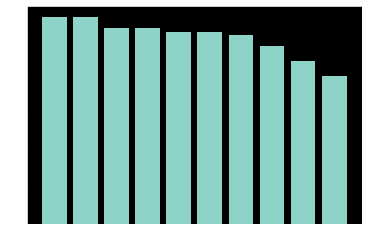

In [3]:
# ENTER YOUR CODE HERE.
df2 = pd.read_csv("sp500.csv")
df2 = df2.set_index("Name")
df2.volume = df2.volume.apply(str)

digit_frequency = df2.volume.str[-1].value_counts()
print(digit_frequency)
plt.bar(digit_frequency.index,digit_frequency)
plt.show()
# plt.hist(df2.volume.str[1].apply(int), bins =[0.5,1.5,2.5])

3. 8 is the most likely last digit and 4 is the least likely. This goes contrary to our prediction that each number should be equally likely. 


## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

1    171
2     55
3     52
6     48
4     43
7     43
5     39
8     28
9     26
Name: close, dtype: int64


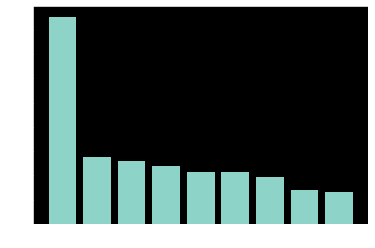

numpy.int64

In [4]:
df2 = pd.read_csv("sp500.csv")
df2 = df2.set_index("Name")
# type(df2.close(1))

df2.close = df2.close.apply(str)

digit_frequency = df2.close.str[1].value_counts()
print(digit_frequency)
plt.bar(digit_frequency.index,digit_frequency)
plt.show()

type(df2.iloc[3,3])


# df2.head()


Pandas thought that this column was integers, it says its of the class numpy.int64 (64 bit integer). 1 was by far the most likely first value for closing prices of S&P500 stocks. 9 was least likely.  

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Demo your lab to obtain credit.  

2. Upload your .ipyn Notebook to iLearn and pdf to Gradescope.